In [31]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from math import log
from sklearn import tree
from collections import Counter
from sklearn import preprocessing
#Import packages

In [23]:
data = pd.read_csv(r"C:\Users\giant\OneDrive\Documents\_GCU_\540_A5.csv")
data

,Day,Temp,Wind,TJ,Drive
0,1,H,W,L,N
1,2,H,S,L,N
2,3,H,W,L,Y
3,4,M,W,L,Y
4,5,C,W,S,Y
5,6,C,S,S,N
6,7,C,S,S,Y
7,8,M,W,L,N
8,9,C,W,S,Y
9,10,M,W,S,Y


In [24]:
# Entropy of the entire set S
c=Counter([i for j in data['Drive'] for i in j])
n=len(data['Drive'])
r1=list(c.values())[0]
r2=list(c.values())[1]
H=round(-(r1/n)*log((r1/n),2)-(r2/n)*log((r2/n),2),4)
H

0.9403

In [172]:
# Information Gain of Traffic Jam
c=Counter([i for j in data['TJ'] for i in j])
n=len(data['TJ'])
r1=list(c.values())[0]
r2=list(c.values())[1]
L=0
for j in [0,1]:
    yy=0
    nn=0
    for i in range(0,n): 
        if data.iloc[i,4]=="Y" and data.iloc[i,3]==list(c.keys())[j]:
            yy=yy+1
        elif data.iloc[i,4]=="N" and data.iloc[i,3]==list(c.keys())[j]:
            nn=nn+1
    q=yy+nn
    e=-(yy/q)*log((yy/q),2)-(nn/q)*log((nn/q),2)
    eq=round(e*(q/n),4)
    L=L+eq
round(H-L,4)

0.1519

In [6]:
# Information Gain of Wind
c=Counter([i for j in data['Wind'] for i in j])
n=len(data['Wind'])
r1=list(c.values())[0]
r2=list(c.values())[1]
L=0
for j in [0,1]:
    yy=0
    nn=0
    for i in range(0,n): 
        if data.iloc[i,4]=="Y" and data.iloc[i,2]==list(c.keys())[j]:
            yy=yy+1
        elif data.iloc[i,4]=="N" and data.iloc[i,2]==list(c.keys())[j]:
            nn=nn+1
    q=yy+nn
    e=-(yy/q)*log((yy/q),2)-(nn/q)*log((nn/q),2)
    eq=round(e*(q/n),4)
    L=L+eq
round(H-L,4)

0.0481

In [7]:
# Information Gain of Temperature
c=Counter([i for j in data['Temp'] for i in j])
n=len(data['Temp'])
r1=list(c.values())[0]
r2=list(c.values())[1]
r3=list(c.values())[2]
L=0
for j in [0,1,2]:
    yy=0
    nn=0
    for i in range(0,n): 
        if data.iloc[i,4]=="Y" and data.iloc[i,1]==list(c.keys())[j]:
            yy=yy+1
        elif data.iloc[i,4]=="N" and data.iloc[i,1]==list(c.keys())[j]:
            nn=nn+1
    q=yy+nn
    e=-(yy/q)*log((yy/q),2)-(nn/q)*log((nn/q),2)
    eq=round(e*(q/n),4)
    L=L+eq
round(H-L,4)

0.0292

In [8]:
# The root node is chosen as the variable with the highest information gain. 
# Based on the above results, this is the Traffic Jam.

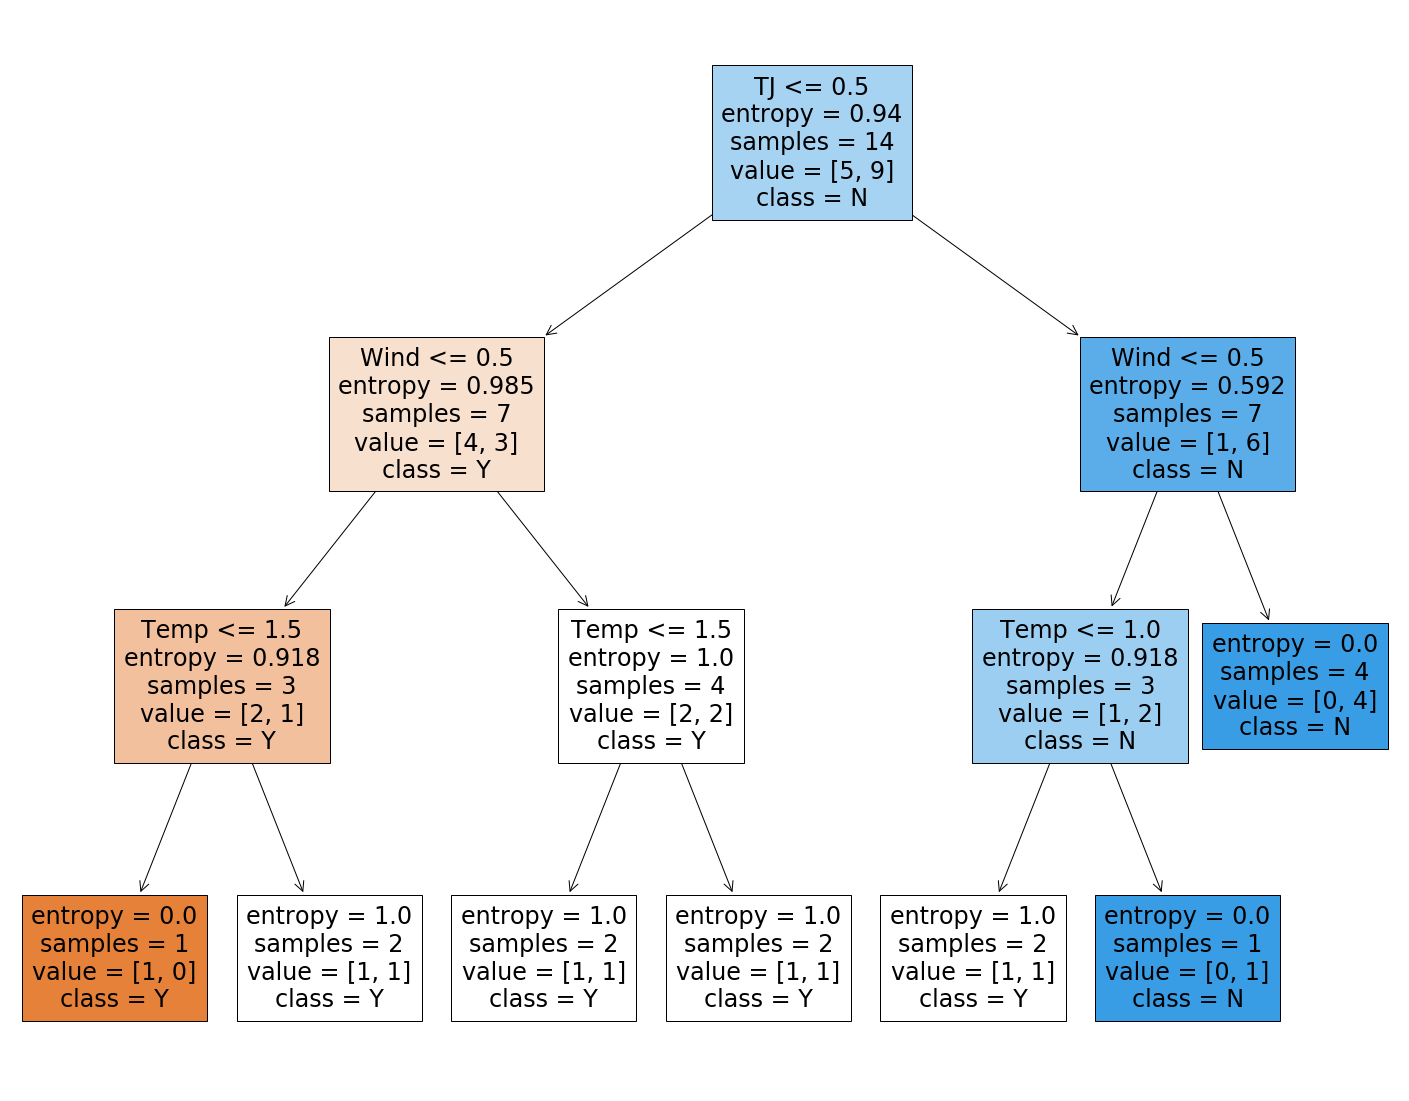

In [21]:
le = preprocessing.LabelEncoder()
data['Temp']=le.fit_transform(data['Temp'])
data['Wind']=le.fit_transform(data['Wind'])
data['TJ']=le.fit_transform(data['TJ'])
y=data[['Drive']]; y_names=['Y','N']
X=data[['Temp','Wind','TJ']]; X_names=['Temp','Wind','TJ']
c1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=None,min_samples_split=2).fit(X,y)
fig1 = plt.figure(figsize=(25,20))
fig1 = tree.plot_tree(c1, 
                   feature_names=X_names,  
                   class_names=y_names,
                   filled=True)

In [10]:
# Because of the way the classifier is programmed in Python, it is impossible to 
# continue until all leaf nodes contain samples of only one classification using 
# the information gain criterion. This is because the argument above, 
# min_samples_split, takes a float that must be greater than 1. 

In [12]:
data2 = pd.read_csv(r"C:\Users\giant\OneDrive\Documents\_GCU_\540_A5_2.csv")
data2

,Day,Temp,Wind,TJ,Drive
0,1,32,3.0,7.5,N
1,2,33,4.5,6.8,N
2,3,30,2.5,8.3,Y
3,4,24,1.5,9.0,Y
4,5,3,2.5,3.8,Y
5,6,1,5.0,4.2,N
6,7,8,4.0,2.7,Y
7,8,12,3.0,6.7,N
8,9,-5,2.0,3.5,Y
9,10,12,2.5,4.1,Y


In [178]:
# Information Gain of Traffic Jam
Li=[];Lj=[];Si=[];Sj=[]
for index,row in data2[['TJ','Drive']].iterrows():
    i=row['TJ']
    j=row['Drive']
    if i>=5:
        Li.append(i);Lj.append(j)
    if i<=9:
        Si.append(i);Sj.append(j)
temp=[];temp.append([Li,Lj,Si,Sj])
long=np.array(temp[0][0])
short=np.array(temp[0][2])
long=np.piecewise(long, [long<=15,long>15], [(long-5)/10,1])
short=np.piecewise(short, [short>=0,short<3], [(9-short)/6,1])
temp[0][0]=[round(x,2) for x in list(long)]
temp[0][2]=[round(x,2) for x in list(short)]
k=0
n=[];y=[]
for i in range(len(temp[0][0])):
    q=temp[0][0][k]
    if temp[0][1][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z1=n+y
z1
e1=round(-(y/z1)*log((y/z1),2)-(n/z1)*log((n/z1),2),4)
k=0
n=[];y=[]
for i in range(len(temp[0][2])):
    q=temp[0][2][k]
    if temp[0][3][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z2=n+y
z2
e2=round(-(y/z2)*log((y/z2),2)-(n/z2)*log((n/z2),2),4)
z3=z1+z2
print(round(H-(z1/z3)*e1-(z2/z3)*e2,4))

0.1158


In [291]:
# Information Gain of Wind
Li=[];Lj=[];Si=[];Sj=[]
for index,row in data2[['Wind','Drive']].iterrows():
    i=row['Wind']
    j=row['Drive']
    if i>=3:
        Li.append(i);Lj.append(j)
    if i<=5:
        Si.append(i);Sj.append(j)
temp=[];temp.append([Li,Lj,Si,Sj])
strong=np.array(temp[0][0])
weak=np.array(temp[0][2])
strong=np.piecewise(strong, [strong<=8,strong>8], [(strong-3)/5,1])
weak=np.piecewise(weak, [weak>=0,weak<3], [(5-weak)/2,1])
temp[0][0]=[round(x,2) for x in list(strong)]
temp[0][2]=[round(x,2) for x in list(weak)]
k=0
n=[];y=[]
for i in range(len(temp[0][0])):
    q=temp[0][0][k]
    if temp[0][1][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z1=n+y
z1
e1=round(-(y/z1)*log((y/z1),2)-(n/z1)*log((n/z1),2),4)
k=0
n=[];y=[]
for i in range(len(temp[0][2])):
    q=temp[0][2][k]
    if temp[0][3][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z2=n+y
z2
e2=round(-(y/z2)*log((y/z2),2)-(n/z2)*log((n/z2),2),4)
z3=z1+z2
print(round(H-(z1/z3)*e1-(z2/z3)*e2,4))

0.0425


In [290]:
# Information Gain of Temperature
Li=[];Lj=[];Si=[];Sj=[];Wi=[];Wj=[]
for index,row in data2[['Temp','Drive']].iterrows():
    i=row['Temp']
    j=row['Drive']
    if i>=25:
        Li.append(i);Lj.append(j)
    if i>=5 and i<=35:
        Si.append(i);Sj.append(j)
    if i<=15:
        Wi.append(i);Wj.append(j)
temp=[];temp.append([Li,Lj,Si,Sj,Wi,Wj])
hot=np.array(temp[0][0])
med=np.array(temp[0][2])
cold=np.array(temp[0][4])
hot=np.piecewise(hot, [hot<=45,hot>45], [(lambda hot: (hot-25)),1])
med=np.piecewise(med, 
                 [med<20,
                       (20<=med)
                       &
                       (med<=30),med>30], 
                 [(lambda med: (med-5)/15),1,(lambda med: (35-med)/5)])
cold=np.piecewise(cold, [cold>=0,cold<15], [(lambda cold: (15-cold)/15),1])
temp[0][0]=[x/10 for x in list(hot)]
temp[0][2]=[round(x,2) for x in list(med)]
temp[0][4]=[round(x,2) for x in list(cold)]
k=0
n=[];y=[]
for i in range(len(temp[0][0])):
    q=temp[0][0][k]
    if temp[0][1][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z1=n+y
z1
e1=round(-(y/z1)*log((y/z1),2)-(n/z1)*log((n/z1),2),4)
k=0
n=[];y=[]
for i in range(len(temp[0][2])):
    q=temp[0][2][k]
    if temp[0][3][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z2=n+y
z2
e2=round(-(y/z2)*log((y/z2),2)-(n/z2)*log((n/z2),2),4)
k=0
n=[];y=[]
for i in range(len(temp[0][4])):
    q=temp[0][4][k]
    if temp[0][5][k]=='N':
        n.append(q)
    else:
        y.append(q)
    k=k+1
n=sum(n);y=sum(y)
z3=n+y
z3
e3=round(-(y/z3)*log((y/z3),2)-(n/z3)*log((n/z3),2),4)
z4=z1+z2+z3
print(round(H-(z1/z4)*e1-(z2/z4)*e2-(z3/z4)*e3,4))

0.0671


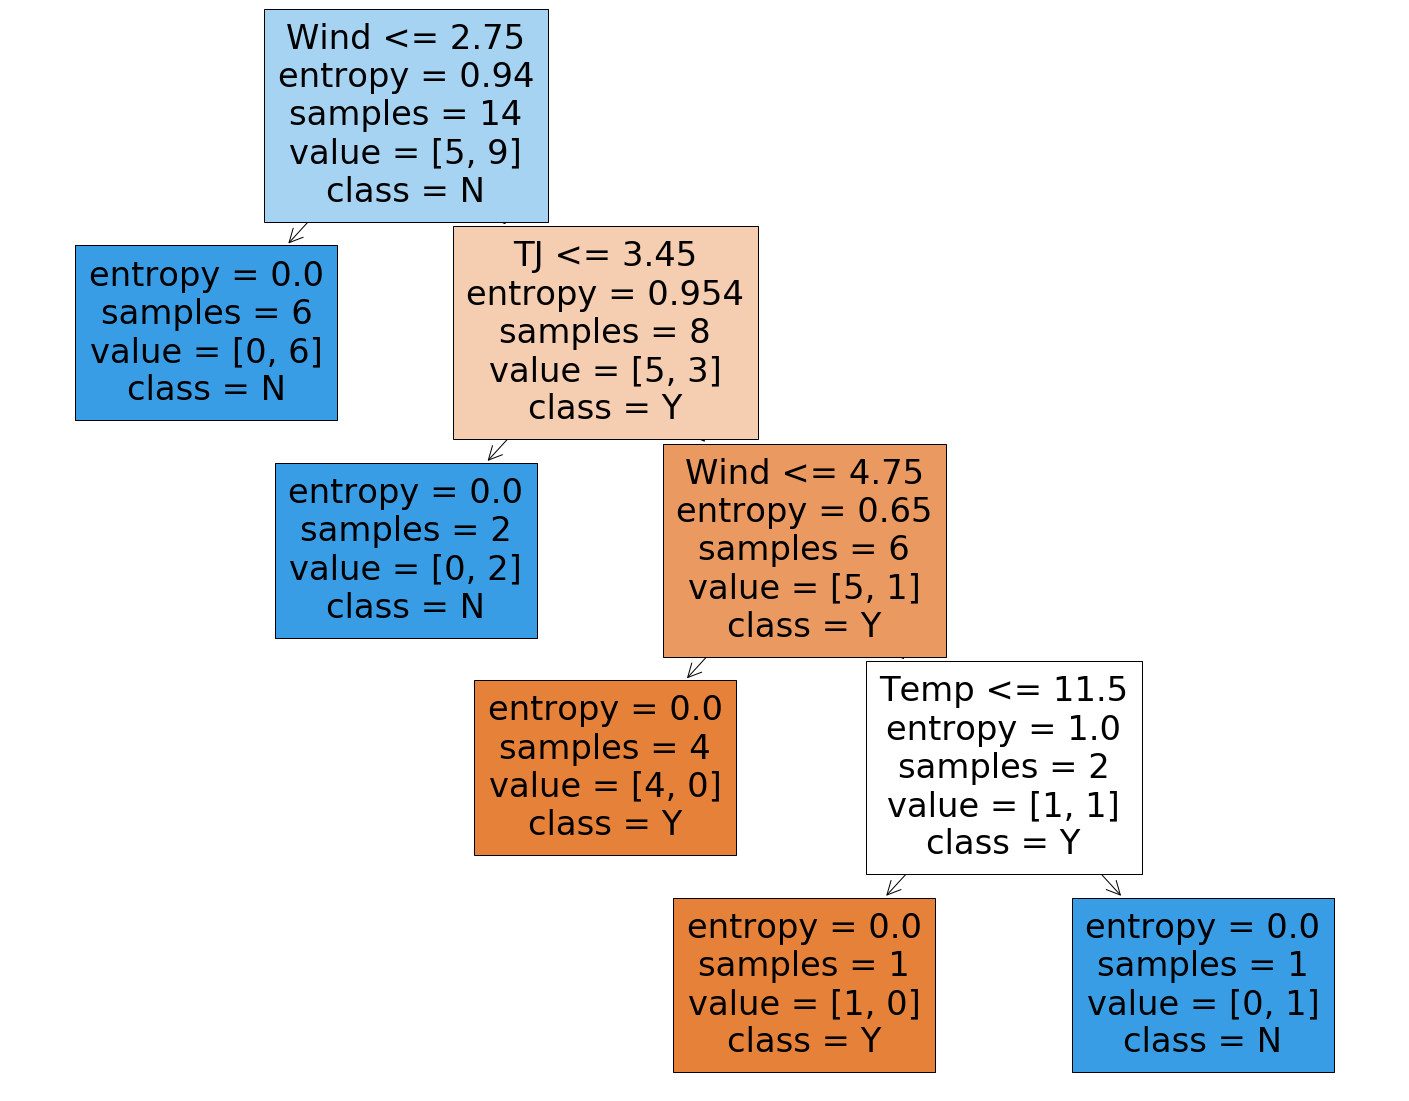

In [292]:
y2=data2[['Drive']]; y_names=['Y','N']
X2=data2[['Temp','Wind','TJ']]; X_names=['Temp','Wind','TJ']
c2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=None,min_samples_split=2).fit(X2,y2)
fig2 = plt.figure(figsize=(25,20))
fig2 = tree.plot_tree(c2, 
                   feature_names=X_names,  
                   class_names=y_names,
                   filled=True)